In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('datasets/costumer-churn-2.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.drop('Surname', axis='columns', inplace=True)

In [18]:
df.drop('RowNumber', axis='columns', inplace=True)

In [21]:
df.drop('CustomerId', axis='columns', inplace=True)

In [27]:
df.dtypes

CreditScore          float64
Gender                 int64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [10]:
def print_unique(df):
    for column in df:
        print(column, df[column].unique())

In [13]:
df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)

In [15]:
df = pd.get_dummies(data=df, columns=['Geography'])

In [25]:
columns_to_scale = [
    'CreditScore', 
    'Age', 
    'Tenure',
    'Balance',
    'NumOfProducts',
    'EstimatedSalary'
]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [26]:
print_unique(df)

CreditScore [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.43

In [32]:
X = df.drop('Exited', axis='columns')
y = df['Exited']

len(df[df.Exited==1]), len(df[df.Exited==0])

(2037, 7963)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [34]:
X_train.shape, y_train.shape

((8000, 12), (8000,))

In [87]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(12,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=30)

Epoch 1/30
250/250 [==============================] - 1s 2ms/step - loss: 0.4683 - accuracy: 0.8008
Epoch 2/30
250/250 [==============================] - 1s 2ms/step - loss: 0.4269 - accuracy: 0.8174
Epoch 3/30
250/250 [==============================] - 1s 2ms/step - loss: 0.3981 - accuracy: 0.8304
Epoch 4/30
250/250 [==============================] - 1s 2ms/step - loss: 0.3666 - accuracy: 0.8475
Epoch 5/30
250/250 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8491
Epoch 6/30
250/250 [==============================] - 1s 2ms/step - loss: 0.3497 - accuracy: 0.8533
Epoch 7/30
250/250 [==============================] - 0s 2ms/step - loss: 0.3449 - accuracy: 0.8537
Epoch 8/30
250/250 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8600
Epoch 9/30
250/250 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.8559
Epoch 10/30
250/250 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.8594

In [88]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8500


[0.35732534527778625, 0.8500000238418579]

In [89]:
y_predicted = model.predict(X_test)
y_predicted_rounded = []
for v in y_predicted:
    if v >= .5:
        y_predicted_rounded.append(1)
        continue
    y_predicted_rounded.append(0)
    
y_test[:10], y_predicted_rounded[:10]

63/63 [==============================] - 0s 1ms/step


(7054    0
 442     0
 3954    0
 2288    0
 3196    0
 6178    0
 8351    0
 5658    1
 2065    0
 413     1
 Name: Exited, dtype: int64,
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [90]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predicted_rounded))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.70      0.45      0.55       405

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

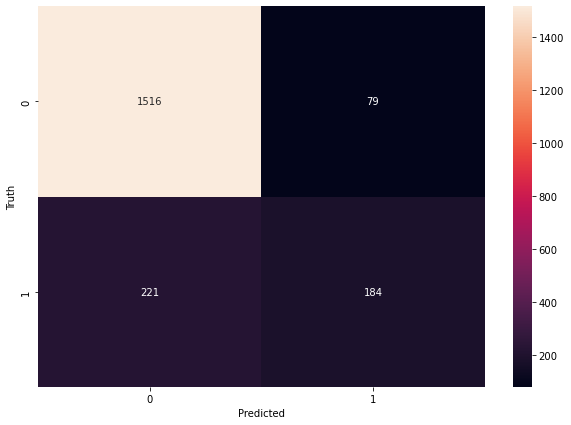

In [91]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_rounded)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')